In [46]:
# Importing necessary modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools


import statsmodels.api as sm

#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
#from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose

#from statsmodels.tsa.ar_model import AR
#from statsmodels.tsa.arima_model import ARMA, ARIMA
#from pyramid.arima import auto_arima

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
# Reading the dataset.
dataset = pd.read_excel('Superstore.csv')
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [48]:
dataset.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [49]:
set(dataset['Category'])

{'Furniture', 'Office Supplies', 'Technology'}

In [50]:
#Data Preprocessing
furniture = dataset.loc[dataset['Category'] == 'Furniture']

#Dates of Furniture Data 
# This shows that we have time-series data of 4 years for furniture sales.
print(furniture['Order Date'].min())
print(furniture['Order Date'].max())


2014-01-06 00:00:00
2017-12-30 00:00:00


In [51]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
        'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
        'Discount', 'Profit']

furniture.drop(cols, axis=1, inplace=True)

C:\Users\Roopansh Sharma\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
# furniture data
furniture.sort_values('Order Date')
furniture.isna().sum()

Order Date    0
Sales         0
dtype: int64

In [53]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [54]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [55]:
# Averaging Daily Sales
y = furniture['Sales'].resample('MS').mean()

y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

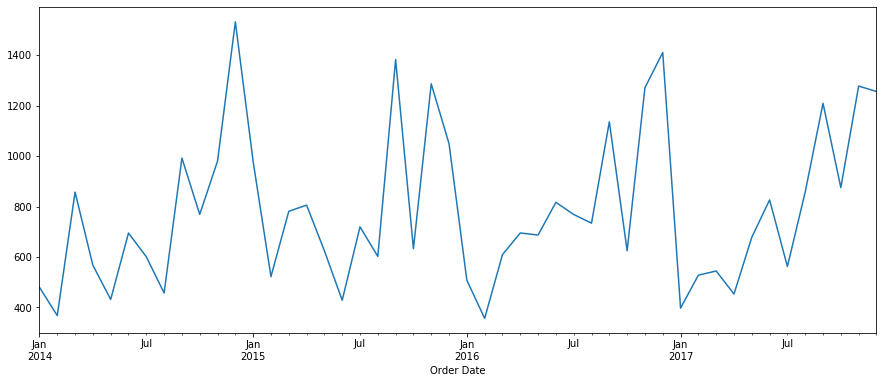

In [56]:
y.plot(figsize=(15,6))


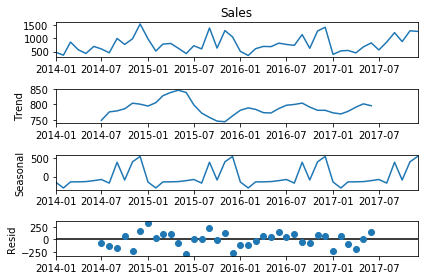

In [57]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

In [62]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [63]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:769.0817523205916


C:\Users\Roopansh Sharma\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1371.2846831167637
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:477.71701309202774
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:302.27028997936867
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:497.23144334183365


C:\Users\Roopansh Sharma\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1288.2086557143118
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:304.2488280301763
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:720.9252270758099
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:3110.0256283610142
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:466.5607429809134
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:291.62613896732864


C:\Users\Roopansh Sharma\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:499.58732996177747


C:\Users\Roopansh Sharma\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:nan
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:319.9884876946869
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:291.87255764301744
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:677.894766843944


C:\Users\Roopansh Sharma\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1296.3205445746705
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:486.63785671879367
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:304.96712281679544
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:497.78896630044073


C:\Users\Roopansh Sharma\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1545.896365429101
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:319.7714068109212
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:306.9113200151475
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:649.9056176817348
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:3004.22904767707
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:458.8705548483069
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:279.5806233334297
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:486.1832977442681
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:2525.4187015615416
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:310.75743684172863
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:281.5576621461243
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:692.1645522067713


C:\Users\Roopansh Sharma\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1334.0563794209827
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:479.46321478521355
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:304.20776751609645
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:480.9259367935203
ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1302.2996763781366
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:304.46646750845713
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:304.58426921438
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:665.7794442186125
ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:3076.0876071149023
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:468.3685195814978
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:293.34221939659403
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:482.57633238770603
ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:2696.7671197710583
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:306.01560021407596
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:293.75131881410135
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:671.2513547541902


C:\Users\Roopansh Sharma\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1146.77433407483
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:479.20034222811347
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:300.21306116191016
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:475.3403658786276


C:\Users\Roopansh Sharma\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1499.3166934027518
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:300.6270901345425
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:302.32649925094216
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:649.0318019835199
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:2429.9684916377455
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:460.4762687611131
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:281.38730069394006
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:469.5250354660868


C:\Users\Roopansh Sharma\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:2528.654365556325
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:297.7875439538972
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:283.36610170504474


In [66]:
# Training the ARIMA model.
model = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


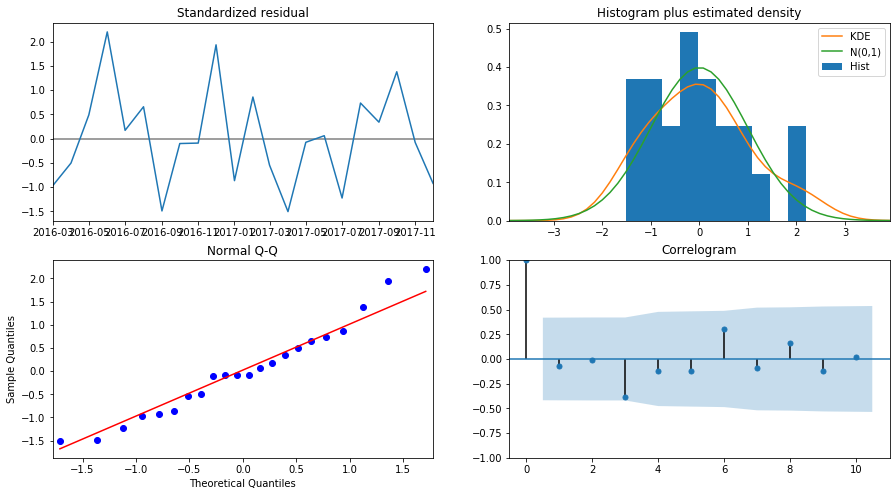

In [65]:
results.plot_diagnostics(figsize=(15, 8))
plt.show()


            lower Sales  upper Sales
Order Date                          
2017-01-01   204.676131   895.517977
2017-02-01    31.859713   721.912969
2017-03-01   296.216005   985.551791
2017-04-01   373.138125  1061.818355
2017-05-01   347.351504  1035.430407
2017-06-01   471.969229  1159.494571
2017-07-01   433.445442  1120.459517
2017-08-01   385.912355  1072.452787
2017-09-01   806.828541  1492.928947
2017-10-01   291.097924   976.788465
2017-11-01   948.687531  1633.995370
2017-12-01  1074.694504  1759.644189


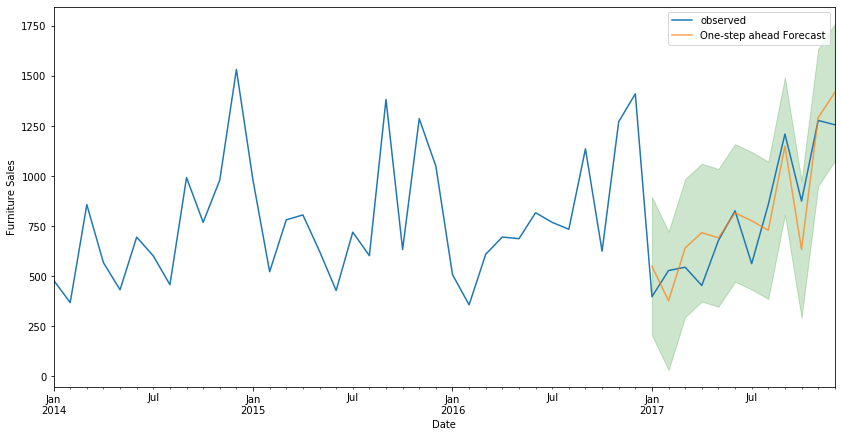

In [70]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='g', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [83]:
y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))

Mean Square Error is: 22993.5706


In [72]:
print('Root Mean Square Error is:', np.sqrt(mse))

Root Mean Square Error is: 151.63631045554135


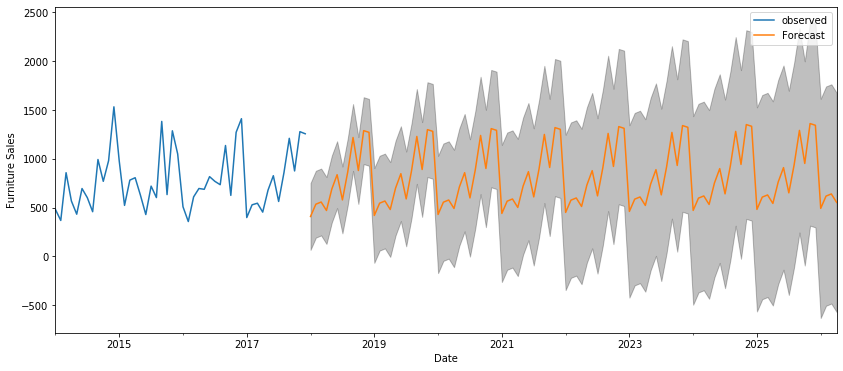

In [84]:
# Forecasting the future (out of sample) values.
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 6))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()